# PA005: High Value Customer Indentification ( Insiders )

## Planejamento da Solução ( IOT )

### Input - Entrada

1. ***Problema de Negócio***
  - Selecionar os clientes mais valiosos para integrar um programa de Fidelização
   
2. ***Conjunto de Dados***
  - Vendas de um e-commerce online, durane o período de um ano.


### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders


  - Lista: 
  
              client_id | is_insider  |
                104224  |   yes/1   
                332131  |   no/0


2. Relatório com as respostas das perguntas de negócio

- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?


### Tasks - Tarefas

##### ***1. Quem são as pessoas elegíveis para participar do programa de Insiders ?***
- ***O que é ser elegível? O que são clientes de maior "valor"?***

- ***Faturamento:***

        - Alto Ticket Médio.
        - Alto LTV (Live Time Value).
        - Baixa Recência.
        - Alto Basket Size.
        - Baixa Probabilidade de Churn.
        - Previsão de LTV.
        - Alta propensão de compra.
- ***Custo:***

        - Baixo custo de devolução

- ***Experiência de compra:***

        - Média alta das avaliações
        

    
##### ***2. Quantos clientes farão parte do grupo?***


        - Número total de clientes
        - % do grupo de Insiders

##### ***3. Quais as principais características desses clientes ?***
- ***Escrever características do cliente:***

        - Idade
        - Localização
- ***Escrever características do consumo:***

        - Atributos de clusterização
        

##### ***4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?***

- ***Faturamento total do ano***

- ***Faturamento do grupo Insiders***


##### 5. ***Qual a expectativa de faturamento desse grupo para os próximos meses ?***

- ***LTV do grupo Insiders***

- ***Análise de Cohort*** 

##### 6. ***Quais as condições para uma pessoa ser elegível ao Insiders ?***

- ***Definir periodicidade ( 1 mês, 3 meses )***

- ***A pessoa precisa ser similar ou parecido com uma pessoa do grupo***

##### 7. ***Quais as condições para uma pessoa ser removida do Insiders ?***

- ***Definir periodicidade ( 1 mês, 3 meses )***

- ***A pessoa precisa ser dissimilar ou não parecida com uma pessoa do grupo***

##### 8. ***Qual a garantia que o programa Insiders é melhor que o restante da base ?***

- ***Teste A/B***

- ***Teste de Hipóteses***

##### 9. ***Quais ações o time de marketing pode realizar para aumentar o faturamento?***

- ***Desconto***
- ***Preferência de Compra***
- ***Frente***
- ***Visita***


## 0.0. Imports

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import metrics as m
from sklearn import preprocessing as pp
from plotly import express as px
import umap.umap_ as umap


### 0.1. Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'ggplot' )
    plt.rcParams[ 'figure.figsize' ] = [24, 9]
    plt.rcParams[ 'font.size' ] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

jupyter_settings() 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 0.2. Load Dataset

In [4]:
# load data
df_raw = pd.read_csv('/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/data/raw/ecommerce.csv', encoding='unicode_escape' )

# drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1 )

In [5]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## <font color='red'> 1.0. Descrição dos Dados </font>

In [44]:
df1 = df_raw.copy()

### 1.1. Rename Columns

In [45]:
cols_new = [ 'invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country' ]
df1.columns = cols_new

### 1.2. Data Dimensions

In [46]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of rows: 541909
Number of cols: 8


### 1.3. Data Types

In [47]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

### 1.4. Check NA

In [48]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### 1.5. Replace NA

In [49]:
# remove NA
df1 = df1.dropna( subset=['description', 'customer_id'] )
print( 'Removed Data: {:.2f}'.format( 1 - ( df1.shape[0] / df_raw.shape[0] ) ) )

Removed Data: 0.25


In [50]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

### 1.6. Change Types

In [51]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [52]:
# invoice_date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y' )

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

### 1.7. Descriptive Statistics

In [53]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### 1.7.1. Numerical Attributes

In [54]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - desvio padrão, mínimo, máximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m


,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,1713.598197,0.029835,-1.179982


#### <font color='red'> 1.7.1.1. Numerical Attributes - Investigating </font>

1. Quantidade negativa ( pode ser devolução?? )
2. Preço unitário igual a zero ( pode ser promoção?? )

#### 1.7.2. Categorical Attributes

In [55]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [56]:
# invoice number


#cat_attributes['invoice_no'].astype( int )
len( cat_attributes.loc[ cat_attributes['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), 'invoice_no'].drop_duplicates() )
#cat_attributes.loc[173995, : ]

3654

In [60]:
# stock code
#at_least_one_string = cat_attributes.loc[ cat_attributes['stock_code'].apply( lambda x: bool ( re.search( '[^0-9+]', x ) ) ), 'stock_code'].head()

#print( at_least_one_string )

#
#cat_attributes.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique() 
df1.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), :].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,POSTAGE,3,2016-11-29,18.00,12583,France
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,2016-11-29,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,12662,Germany
2239,536569,M,Manual,1,2016-11-29,1.25,16274,United Kingdom


## <font color='red'> 2.0. Filtragem das Variáveis </font>

In [114]:
df2 = df1.copy()

In [115]:
# ===== Numerical Attributes ======
# unit price > 0.0
df2 = df2.loc[df2['unit_price'] > 0.010, :]

# stock code != [ POST, D, M, DOT, CRUK ]
df2 = df2[~df2['stock_code'].isin( [ 'POST', 'D', 'M', 'DOT', 'CRUK', 'C2' ]) ] 

# description

## quantity - Negative numbers means product returns
df2_returns = df2.loc[df2['quantity'] < 0, :]
df2_purchase = df2.loc[df2['quantity'] > 0, :]

In [116]:
df2.loc[ df2['invoice_no'].apply( lambda x: bool (re.search( '.540152', x ) ) ), :].head()
df2.loc[df2['customer_id'] == 12395, : ].sort_values('description')
df2.loc[ df2['quantity'] < 0, :].sort_values( [ 'customer_id', 'description' ] ).head(40)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2017-01-16,1.04,12346,United Kingdom
129743,C547388,21914,BLUE HARMONICA IN BOX,-12,2017-03-20,1.25,12352,Norway
129738,C547388,37448,CERAMIC CAKE DESIGN SPOTTED MUG,-12,2017-03-20,1.49,12352,Norway
129741,C547388,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,-12,2017-03-20,1.45,12352,Norway
129739,C547388,22784,LANTERN CREAM GAZEBO,-3,2017-03-20,4.95,12352,Norway
129742,C547388,22413,METAL SIGN TAKE IT OR LEAVE IT,-6,2017-03-20,2.95,12352,Norway
129740,C547388,22701,PINK DOG BOWL,-6,2017-03-20,2.95,12352,Norway
129737,C547388,84050,PINK HEART SHAPE EGG FRYING PAN,-12,2017-03-20,1.65,12352,Norway
154936,C549955,22839,3 TIER CAKE TIN GREEN AND CREAM,-2,2017-04-11,14.95,12359,Cyprus
519796,C580165,22797,CHEST OF DRAWERS GINGHAM HEART,-2,2017-11-30,16.95,12359,Cyprus


## <font color='red'> 3.0. Feature Engineering </font>

In [117]:
df3 = df2.copy()

### 3.1. Feature Creation

In [118]:
# data reference
df_ref = df3.drop( ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country' ], axis=1 ).drop_duplicates( ignore_index=True)

In [119]:
# Gross Revenue ( Faturamento )
df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] * df2_purchase.loc[:, 'unit_price']

# Monetary
df_monetary = df2_purchase[['customer_id', 'gross_revenue']].groupby( 'customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, how='left', on='customer_id' )
df_ref.isna().sum()

/var/folders/w5/0w2xv4r95g1gfgbzpp2dm6gr0000gn/T/ipykernel_58556/3199604808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] * df2_purchase.loc[:, 'unit_price']


customer_id       0
gross_revenue    27
dtype: int64

In [120]:
# Recency - It depends on product returns

df_recency = df2_purchase[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2_purchase['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, how='left', on='customer_id' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
dtype: int64

In [122]:
# Frequency - It depends os product returns

df_frequency = df2_purchase[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_frequency, how='left', on='customer_id' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
dtype: int64

In [123]:
# Average Ticket
df_avg_ticket = df2_purchase[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue' : 'avg_ticket' } ) 
df_avg_ticket['avg_ticket'] = np.round( df_avg_ticket['avg_ticket'], 2 )
df_ref = pd.merge( df_ref, df_avg_ticket, how='left', on='customer_id' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
dtype: int64

In [124]:
# Number of returns
df_returns = df2_returns[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index().rename( columns={'invoice_no': 'returns' } )
df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['returns'].isna(), 'returns'] = 0
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
returns           0
dtype: int64

In [125]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,17850,5391.21,372.0,34.0,18.15,1.0
1,13047,3232.59,56.0,9.0,18.90,7.0
2,12583,6705.38,2.0,15.0,28.90,2.0
3,13748,948.25,95.0,5.0,33.87,0.0
4,15100,876.00,333.0,3.0,292.00,3.0


In [65]:
# # data reference

# df_ref = df3.drop( ['invoice_no', 'stock_code', 'description', 'quantity',
#                     'invoice_date', 'unit_price', 'country'],
#                      axis=1 ).drop_duplicates( ignore_index=True)

# df_ref.head()
# # Gross Renevue ( Faturamento - quantity * price)
# df3['gross_revenue'] = df3['quantity'] * df3['unit_price']

# # Monetary
# df_monetary = df3[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
# df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

# # Recency - Last Day Purchase
# df_recency = df3[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
# df_recency['recency_days'] = ( df3['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
# df_recency = df_recency[['customer_id', 'recency_days']].copy()
# df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

# # Frequency
# df_freq = df3[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
# df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )

# # Avg Ticket
# df_avg_ticket = df3[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
# df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left' )

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [67]:
df3 = df_ref.copy()

## <font color='red'> 4.0. EDA ( Exploratory Data Analysis )</font>

In [126]:
df4 = df_ref.dropna().copy()

In [127]:
df4.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
avg_ticket       0
returns          0
dtype: int64

## <font color='red'> 5.0. Data Preparation</font>

In [128]:
df5 = df4.copy()

In [129]:
df5.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,17850,5391.21,372.0,34.0,18.15,1.0
1,13047,3232.59,56.0,9.0,18.90,7.0
2,12583,6705.38,2.0,15.0,28.90,2.0
3,13748,948.25,95.0,5.0,33.87,0.0
4,15100,876.00,333.0,3.0,292.00,3.0


In [156]:
ss = pp.MinMaxScaler()

df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']])
df5['recency_days'] = ss.fit_transform( df5[['recency_days']])
df5['invoice_no'] = ss.fit_transform( df5[['invoice_no']])
df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']])
df5['returns'] = ss.fit_transform( df5[['returns']])

## <font color='red'> 6.0. Feature Selection</font>

In [157]:
df6 = df5.copy()

## <font color='red'> 7.0. Hyperparameter Fine-Tunning </font>

In [158]:
X = df6.drop( columns=['customer_id'] )

In [159]:
clusters = [2, 3, 4, 5, 6, 7]

### 7.1. Within-Cluster Sum of Square ( WSS )

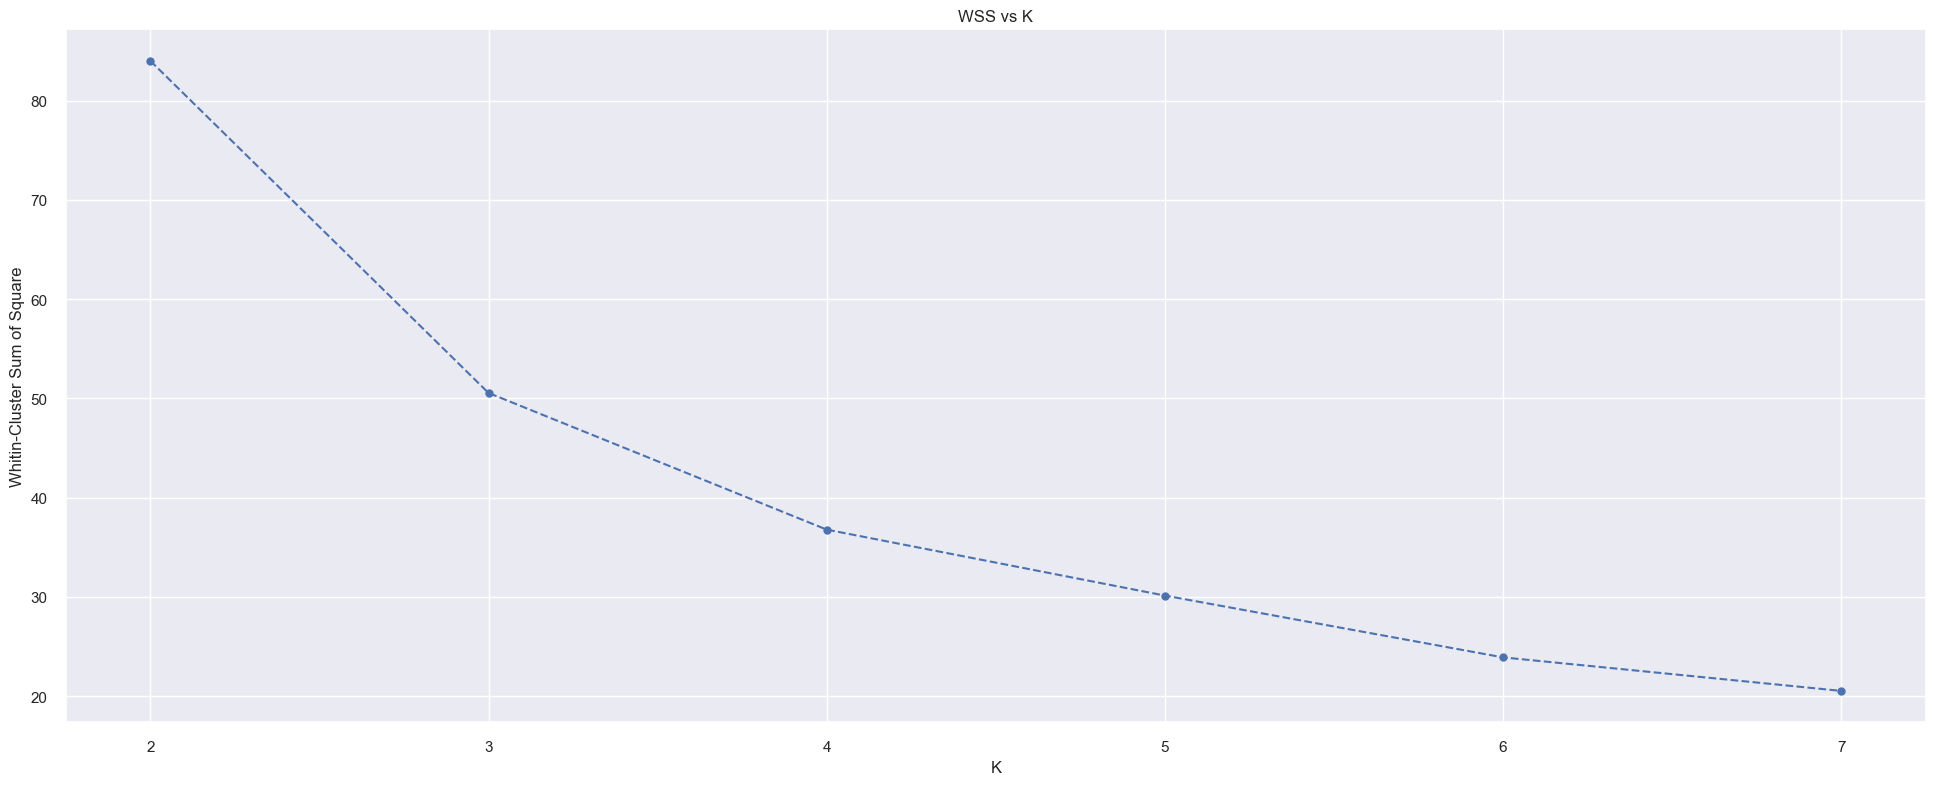

In [160]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

    # model training
    kmeans.fit( X )

    # validation
    wss.append( kmeans.inertia_ )

# plot wss - Elbow Method
plt.plot( clusters, wss, linestyle='--', marker='o', color='b' );
plt.xlabel( 'K' );
plt.ylabel( 'Whitin-Cluster Sum of Square' );
plt.title( 'WSS vs K');

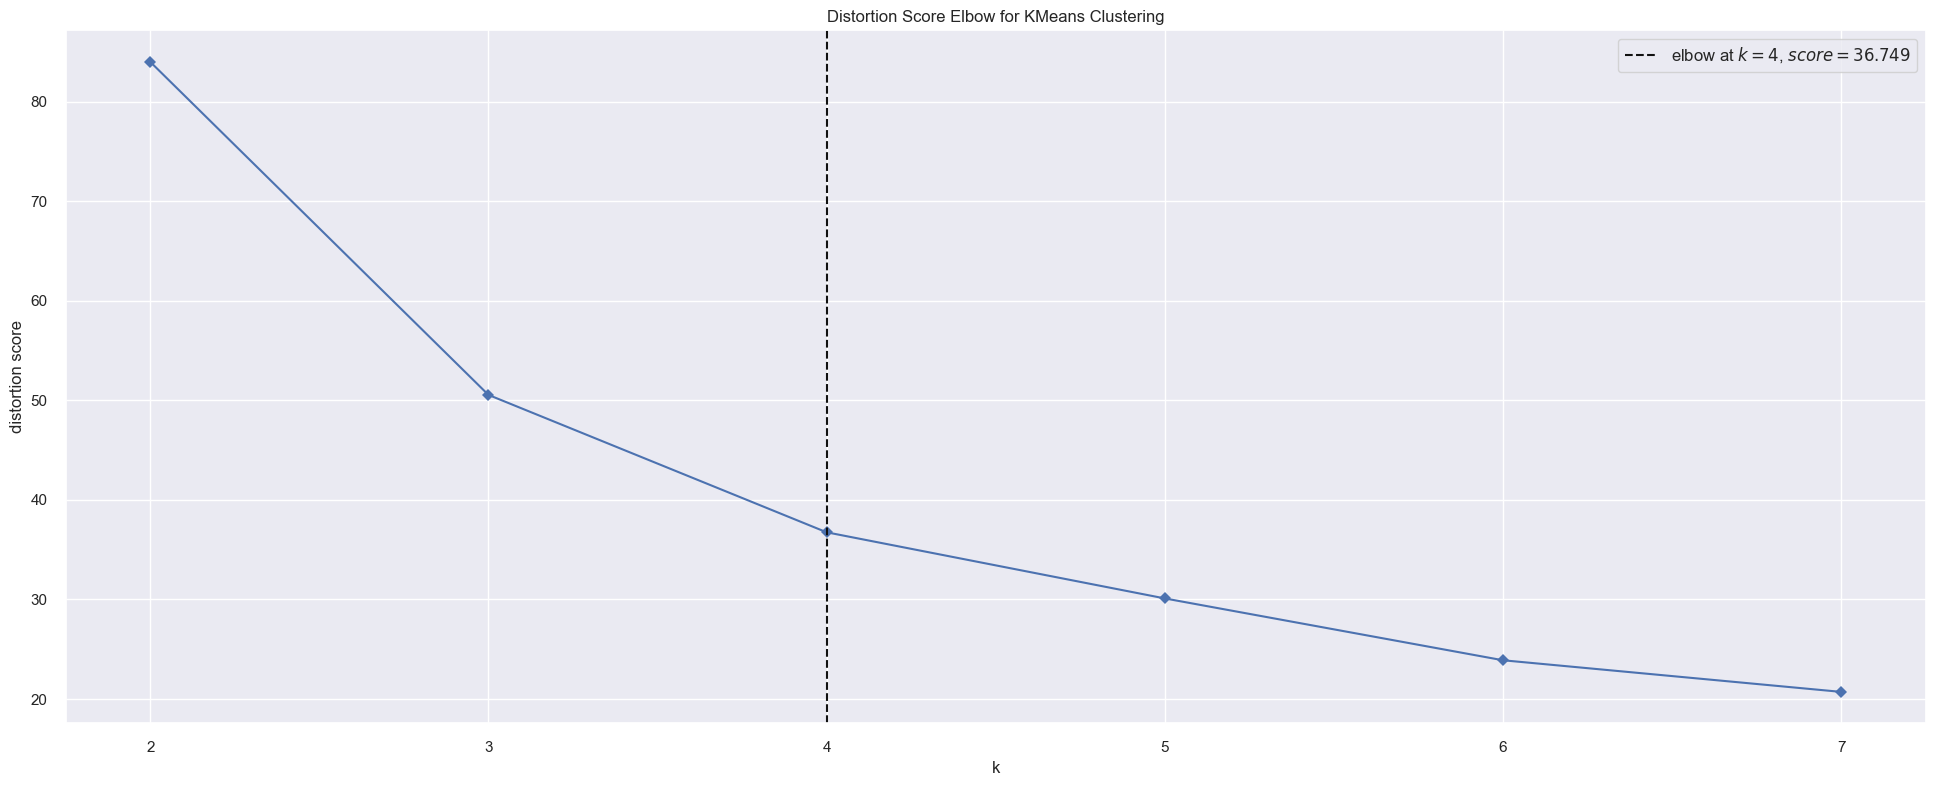

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [161]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

### 7.2. Silhouette Score

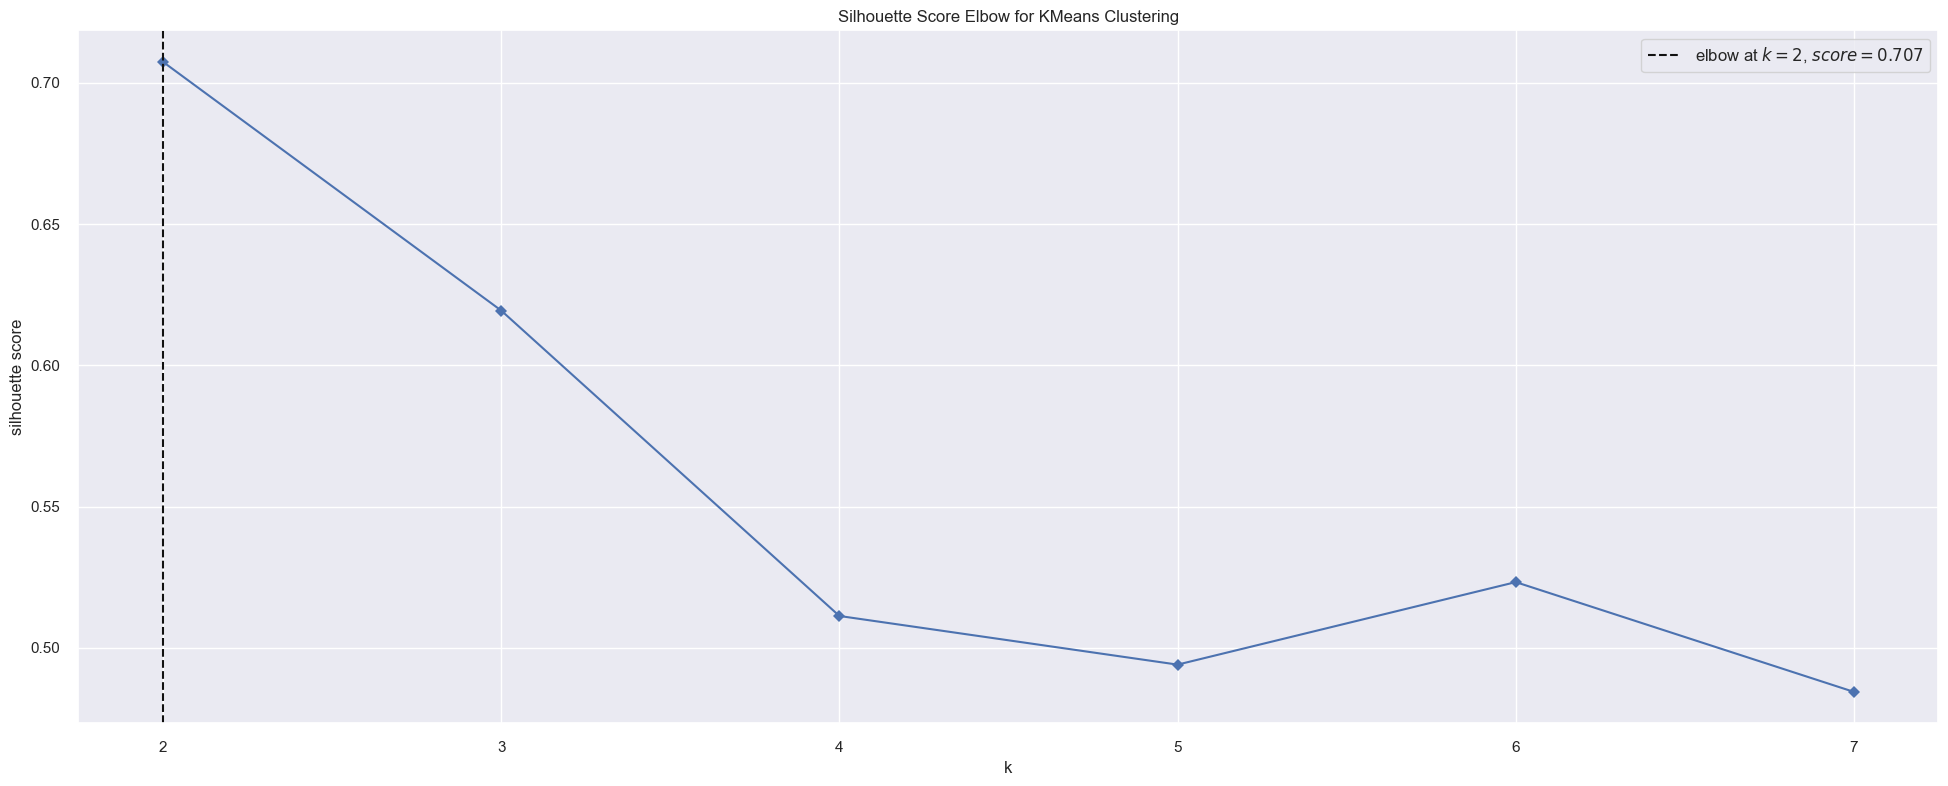

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [162]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette',  timings=False )
kmeans.fit( X )
kmeans.show()

### 7.3 Silhouette Analysis

In [163]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,0.019301,0.997319,0.160976,0.000208,0.022222
1,0.011567,0.150134,0.039024,0.000218,0.155556
2,0.024009,0.005362,0.068293,0.000347,0.044444
3,0.003384,0.254692,0.019512,0.000412,0.000000
4,0.003125,0.892761,0.009756,0.003756,0.066667


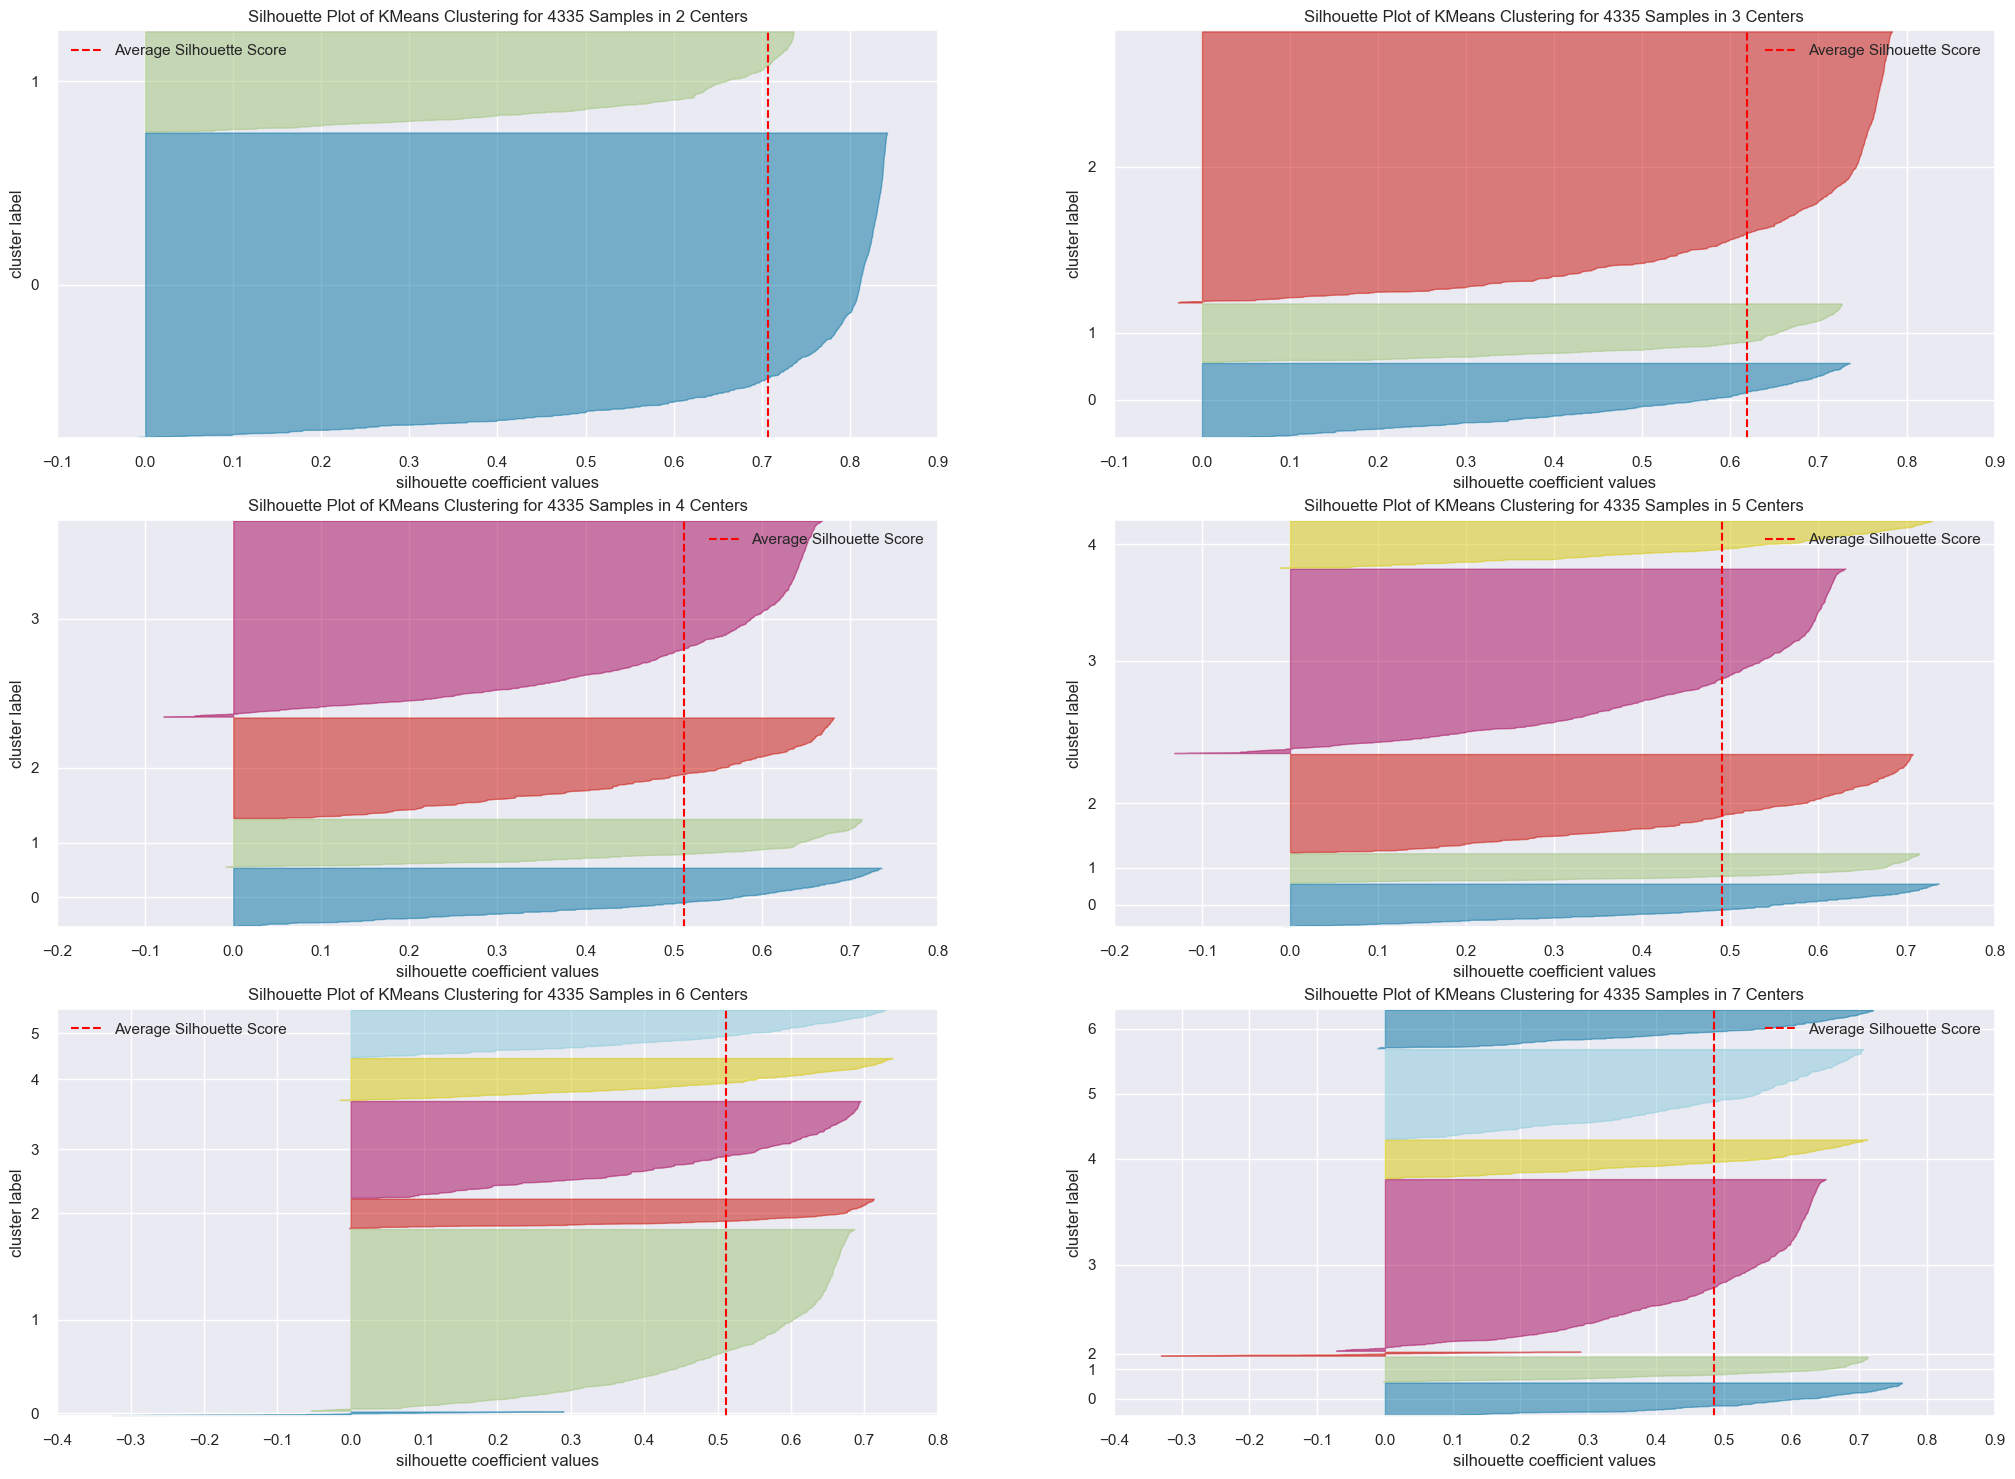

In [164]:
fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )


for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )

    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][ mod ] )
    visualizer.fit ( X )
    visualizer.finalize()

## <font color='red'> 8.0. Model Training </font>

### 8.1. K-Means

In [165]:
# model definition
k = 6
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

### 8.2. Cluster Validation

In [166]:
## WSS ( Within-Cluster Sum of Square )
print( 'WSS Value: {}'.format( kmeans.inertia_ ) )

## SS ( Silhouette Score )
print ( 'SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

WSS Value: 23.909282361031526
SS value: 0.5111320210898233


## <font color='red'> 9.0. Cluster Analysis </font>

In [167]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns,cluster
0,17850,0.019301,0.997319,0.160976,0.000208,0.022222,2
1,13047,0.011567,0.150134,0.039024,0.000218,0.155556,3
2,12583,0.024009,0.005362,0.068293,0.000347,0.044444,1
3,13748,0.003384,0.254692,0.019512,0.000412,0.000000,3
4,15100,0.003125,0.892761,0.009756,0.003756,0.066667,2


### 9.1. Visualization Inspection

In [168]:
#fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster' )
#fig.show()

/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/ins_clustenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


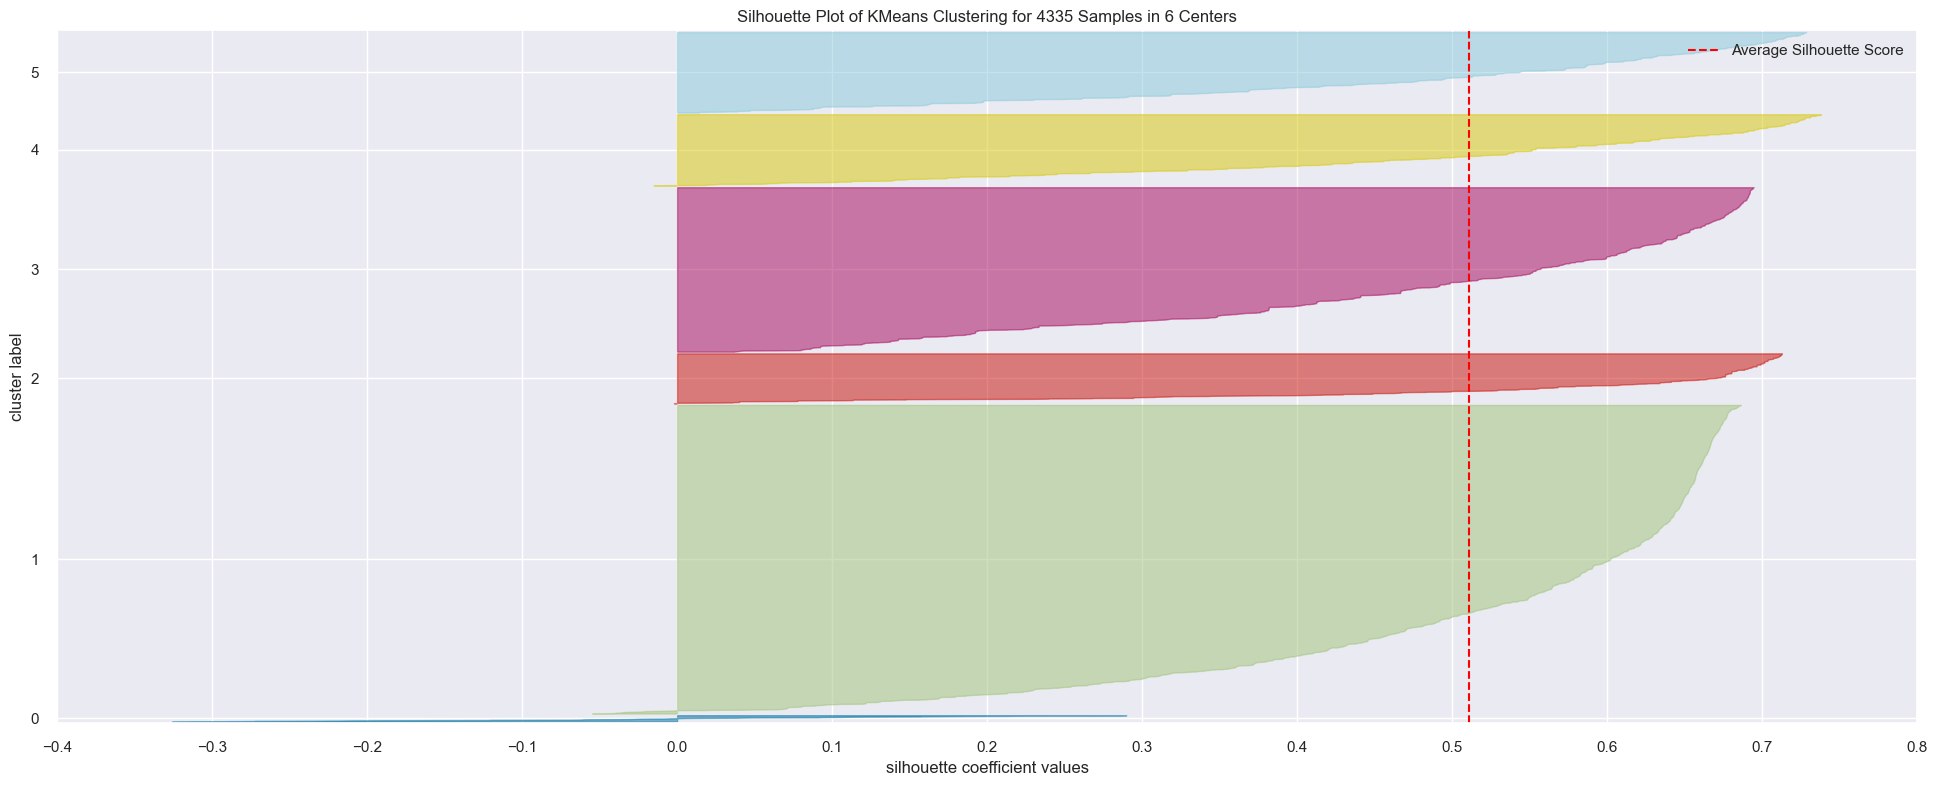

In [169]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

### 9.2. 2D Plot

In [170]:
df9.head(10)

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns,cluster
0,17850,0.019301,0.997319,0.160976,0.000208,0.022222,2
1,13047,0.011567,0.150134,0.039024,0.000218,0.155556,3
2,12583,0.024009,0.005362,0.068293,0.000347,0.044444,1
3,13748,0.003384,0.254692,0.019512,0.000412,0.000000,3
4,15100,0.003125,0.892761,0.009756,0.003756,0.066667,2
5,15291,0.016550,0.067024,0.063415,0.000560,0.111111,1
6,14688,0.020159,0.018767,0.097561,0.000196,0.133333,1
7,17809,0.019375,0.042895,0.053659,0.001122,0.044444,1
8,15311,0.217688,0.000000,0.439024,0.000304,0.600000,0
9,16098,0.007172,0.233244,0.029268,0.000361,0.000000,3


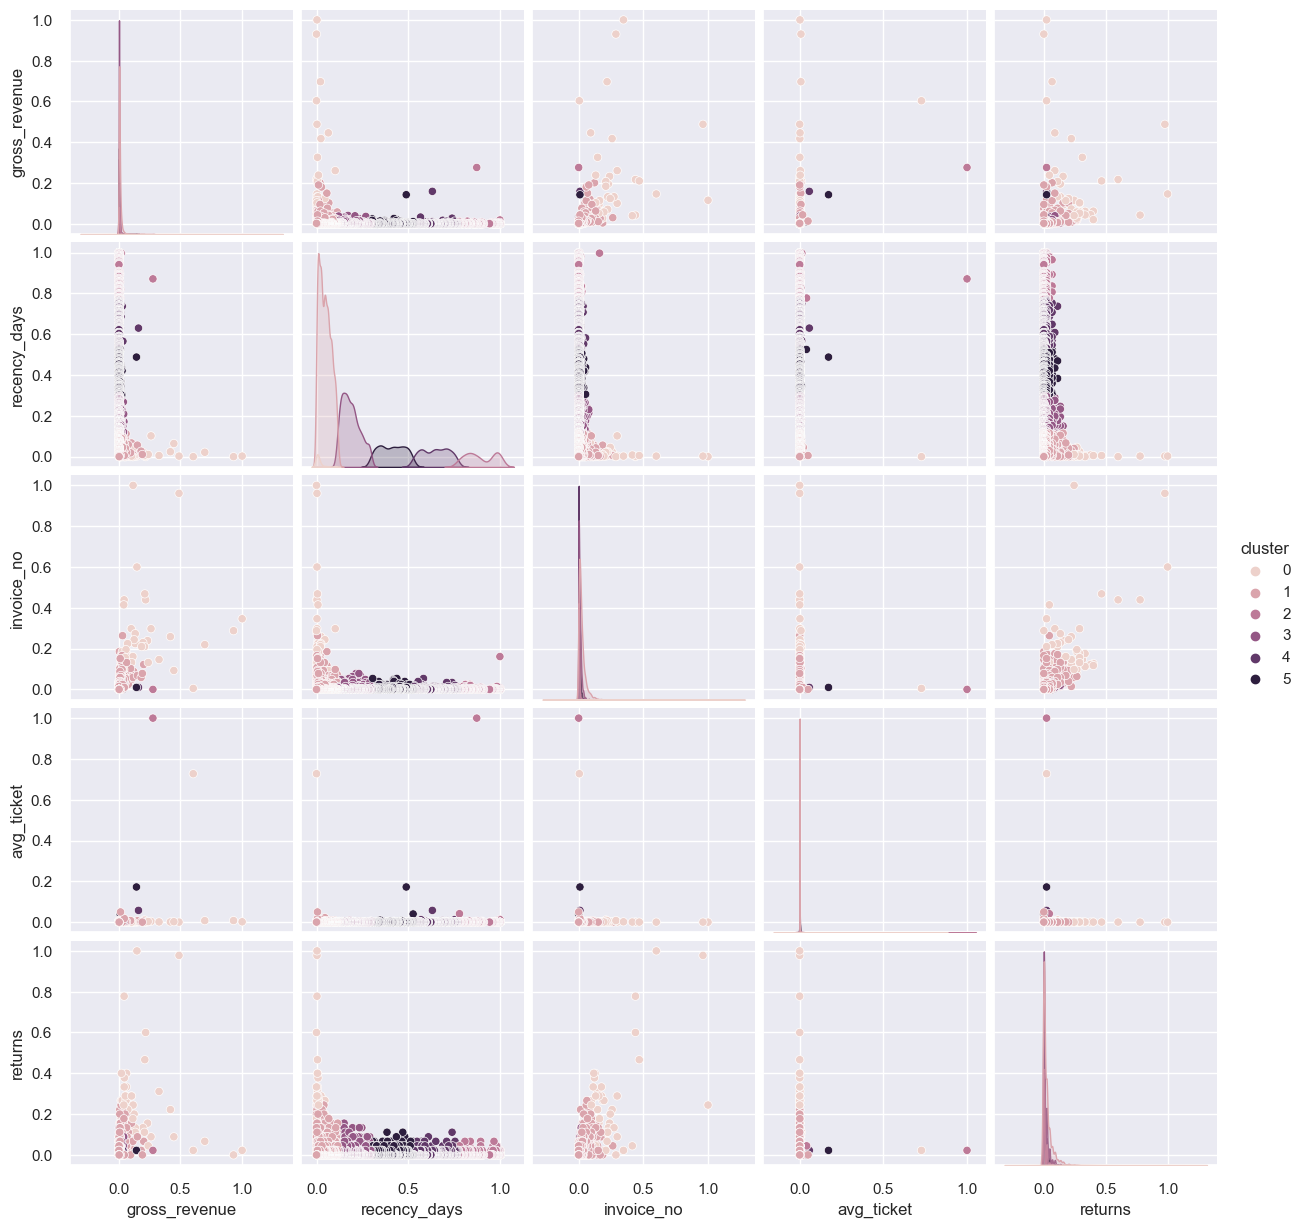

In [171]:
df_viz = df9.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster' )


### 9.3. UMAP

In [172]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,0.019301,0.997319,0.160976,0.000208,0.022222
1,0.011567,0.150134,0.039024,0.000218,0.155556
2,0.024009,0.005362,0.068293,0.000347,0.044444
3,0.003384,0.254692,0.019512,0.000412,0.000000
4,0.003125,0.892761,0.009756,0.003756,0.066667


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

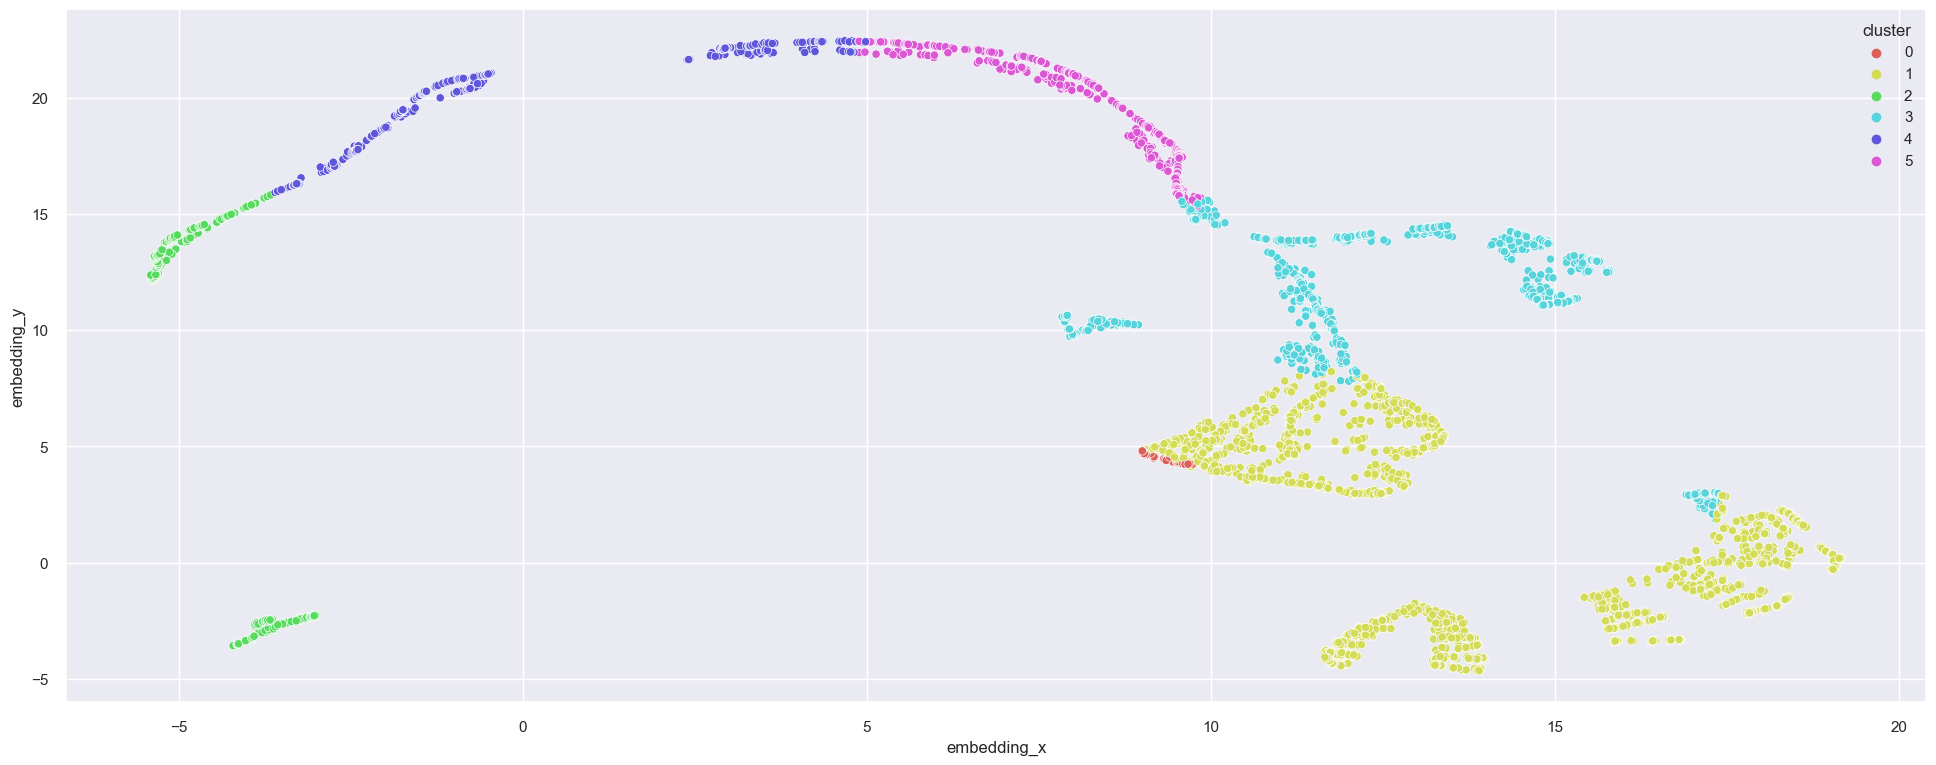

In [174]:
reducer = umap.UMAP( n_neighbors=80, random_state = 42 )
embedding = reducer.fit_transform( X ) # espaço projetado

# embeddind
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )


### 9.2. Cluster Profile

In [46]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


In [45]:
# Number of Customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_cluster'] = 100 * ( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Average Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Average Recency Days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Average Invoice_no
df_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_invoice_no, how='inner', on='cluster')

# Avg Ticket
df_ticket = df9[['avg_ticket', 'cluster' ]].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster

,cluster,customer_id,perc_cluster,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,4071,93.115279,946.696250,96.969295,3.641120,25.359654
1,1,6,0.137237,182181.981667,7.166667,89.000000,253.626345
2,2,28,0.640439,42614.387143,6.178571,57.821429,162.862605
3,3,267,6.107045,8089.028652,20.280899,19.528090,62.783157


### Cluster 01: ( Candidato à Insider )
    - Número de customers: 6 ( 14% dos customers )
    - Recência em média: 7 dias
    - Compras em média: 89 compras
    - Receita em média: $182.182,00

### Cluster 02:
    - Número de customers: 31 ( 71% dos customers )
    - Recência em média: 14 dias
    - Compras em média: 53 compras
    - Receita em média: $40.543,52

### Cluster 03:
    - Número de customers: 4335 ( 99% dos customers )
    - Recência em média: 92 dias
    - Compras em média: 5 compras
    - Receita em média: $1.372,57

## <font color='red'> 10.0 Deploy To Production </font>